In [19]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv("placement.csv")

In [21]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
df.shape

(100, 4)

In [23]:
# Steps

# 0. Preprocess + EDA (Exploratory Data Analysis) + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values [-1,1]
# 3. Train test split (Cross Validation)
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [25]:
df = df.iloc[:,1:]

In [26]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [27]:
import matplotlib.pyplot as plt

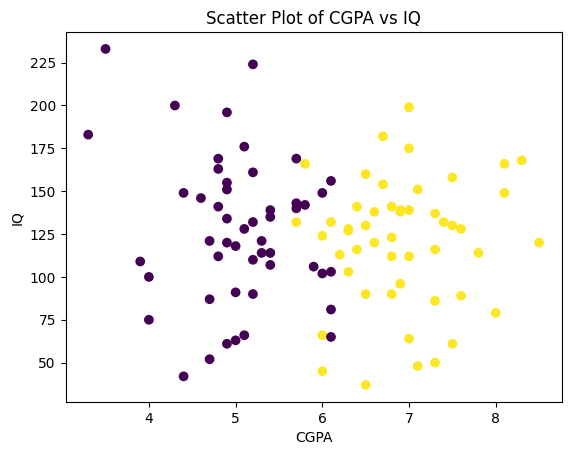

In [18]:
# Adding labels
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ')

# Scatter plot
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])
# Display the plot
plt.show()

In [30]:
X = df.iloc[:, 0:2]

In [31]:
Y = df.iloc[:, -1]

In [32]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [34]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
# train_test_split(X, Y, test_size = 0.1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [43]:
print(X_train)
print(X_train.shape)

    cgpa     iq
27   6.0  124.0
12   5.4  139.0
85   5.8  166.0
80   4.9  196.0
72   7.3  116.0
..   ...    ...
35   6.8   90.0
38   6.5  160.0
41   5.4  114.0
1    5.9  106.0
92   5.2  110.0

[90 rows x 2 columns]
(90, 2)


In [44]:
print(X_test)
print(X_test.shape)

    cgpa     iq
11   6.9  138.0
50   3.5  233.0
94   4.7   52.0
26   7.0  199.0
84   5.7  169.0
62   6.0  102.0
98   6.3  103.0
64   7.0   64.0
67   5.0  118.0
58   8.0   79.0
(10, 2)


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [49]:
X_train = scaler.fit_transform(X_train) # Scale the values

In [50]:
X_train

array([[ 0.00989207,  0.01748993],
       [-0.52427985,  0.41768314],
       [-0.16816524,  1.13803092],
       [-0.96942313,  1.93841734],
       [ 1.16726458, -0.19594645],
       [-0.79136582, -1.52992382],
       [ 1.34532189, -1.66332156],
       [ 0.98920727, -2.01015568],
       [-0.61330851, -0.06254872],
       [ 0.36600669, -0.19594645],
       [-0.96942313,  0.2842854 ],
       [ 1.34532189,  0.17756721],
       [ 0.27697804,  0.09752857],
       [-1.05845178, -0.30266464],
       [ 0.72212131, -0.30266464],
       [ 0.09892073, -1.12973061],
       [-1.05845178,  1.05799227],
       [ 2.23560844, -0.08922826],
       [-1.85970967, -0.38270329],
       [ 0.36600669,  0.47104223],
       [ 0.81114996, -0.7295374 ],
       [-0.79136582,  0.12420812],
       [ 0.09892073,  0.87123544],
       [-1.4145664 , -2.17023296],
       [ 0.90017862,  0.41768314],
       [-0.70233716,  1.00463318],
       [ 1.25629324,  0.2309263 ],
       [ 1.87949382,  0.68447861],
       [-0.79136582,

In [52]:
X_test = scaler.transform(X_test)

In [53]:
X_test

array([[ 0.81114996,  0.39100359],
       [-2.21582429,  2.92556059],
       [-1.14748044, -1.90343749],
       [ 0.90017862,  2.01845598],
       [-0.25719389,  1.21806956],
       [ 0.00989207, -0.56946012],
       [ 0.27697804, -0.54278057],
       [ 0.90017862, -1.58328292],
       [-0.88039447, -0.14258736],
       [ 1.79046516, -1.18308971]])

# Train the Model

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression()

In [58]:
#Train model
clf.fit(X_train, Y_train) 

LogisticRegression()

In [59]:
Y_pred = clf.predict(X_test)

In [60]:
Y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [62]:
Y_test

11    1
50    0
94    0
26    1
84    0
62    0
98    1
64    1
67    0
58    1
Name: placement, dtype: int64

In [63]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(Y_test,Y_pred)

0.9

In [69]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

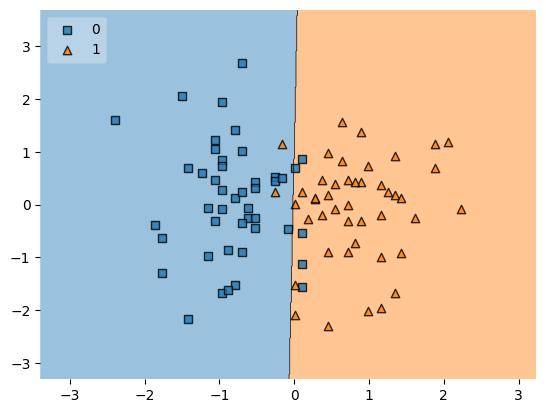

In [74]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [75]:
import pickle

In [76]:
pickle.dump(clf,open('model.pkl','wb'))